In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r"C:\Users\sreep\OneDrive\Desktop\pavan\vscode\Zomato data analysis\Zomato data .csv")
print(df.to_string())

                                                name online_order book_table    rate  votes  approx_cost(for two people) listed_in(type)
0                                              Jalsa          Yes        Yes   4.1/5    775                          800          Buffet
1                                     Spice Elephant          Yes         No   4.1/5    787                          800          Buffet
2                                    San Churro Cafe          Yes         No   3.8/5    918                          800          Buffet
3                              Addhuri Udupi Bhojana           No         No   3.7/5     88                          300          Buffet
4                                      Grand Village           No         No   3.8/5    166                          600          Buffet
5                                    Timepass Dinner          Yes         No   3.8/5    286                          600          Buffet
6    Rosewood International Hotel - Bar &

In [3]:
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
def handle_rate(value):
    value=str(value).split("/")
    value=value[0]
    return float(value)

df['rate'] = df['rate'].apply(handle_rate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0, 0.5, 'no.of restaurents')

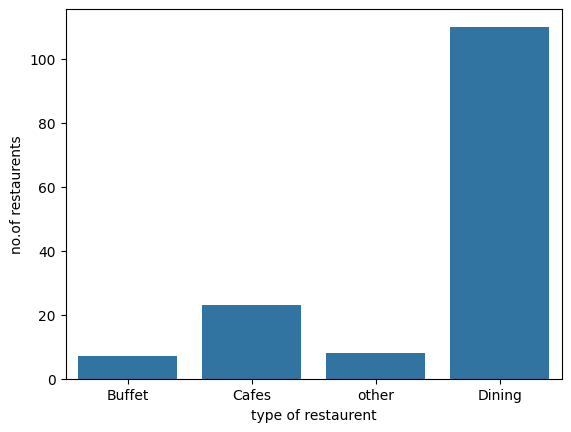

In [10]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of restaurent")
plt.ylabel("no.of restaurents")

Text(0, 0.5, 'votes')

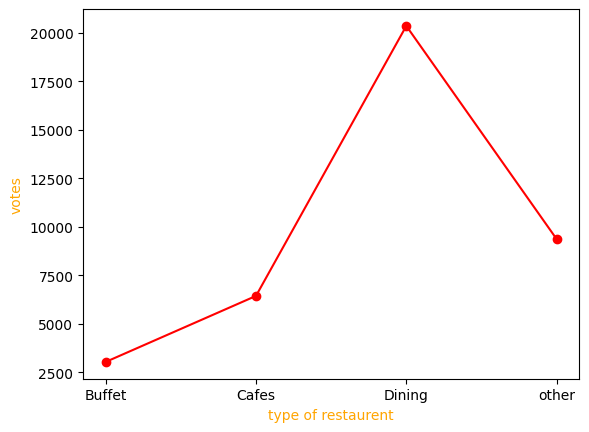

In [17]:
grp_data = df.groupby('listed_in(type)')['votes'].sum()
res=pd.DataFrame({'votes': grp_data})
plt.plot(res, c="red",marker="o")
plt.xlabel("type of restaurent", c="orange",size=10)
plt.ylabel("votes", c="orange", size=10)

In [ ]:
max_votes = df['votes'].max()
restaurent_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print("Restaurent(s) with the maximum votes:")
print(restaurent_with_max_votes)

Restaurent(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

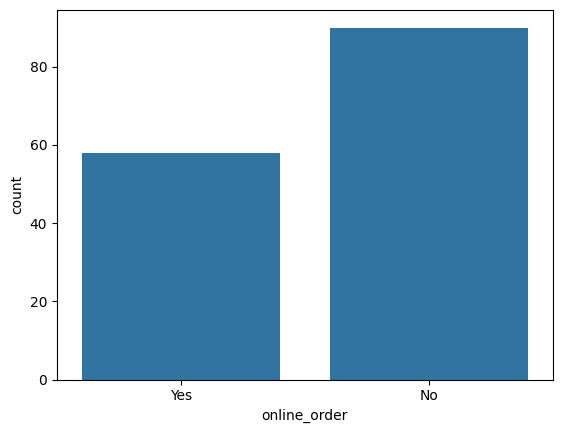

In [20]:
sns.countplot(x=df['online_order'])

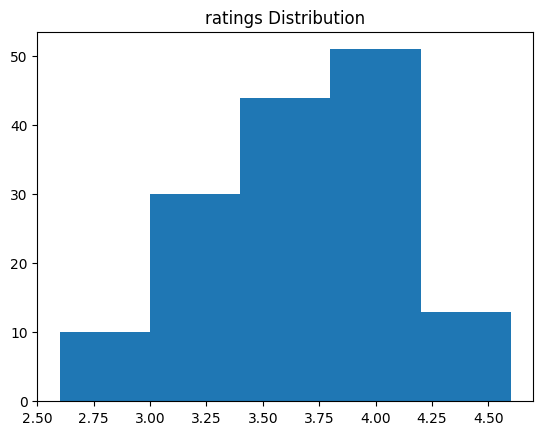

In [25]:
plt.hist(df['rate'],bins=5)
plt.title("ratings Distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

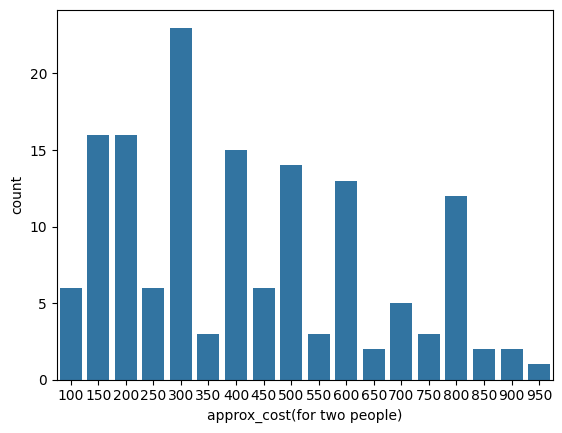

In [26]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

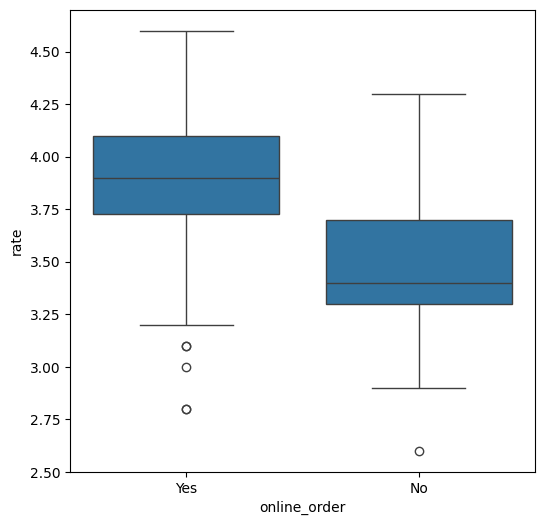

In [27]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order',y='rate',data=df)

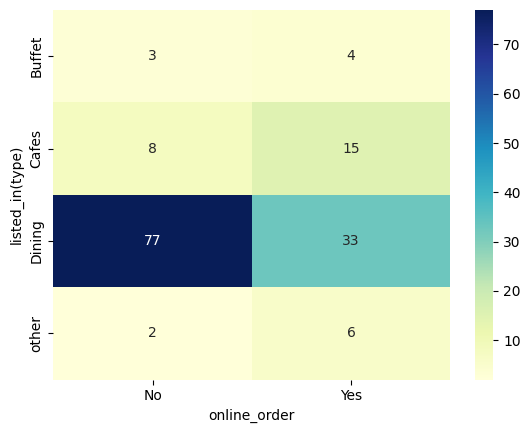

In [30]:
pt = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pt,annot=True, cmap="YlGnBu", fmt='d')
plt.show()